$\qquad$ $\qquad$$\qquad$  **TDA 231 Machine Learning: Homework 5** <br />
$\qquad$ $\qquad$$\qquad$ **Goal: Clustering**<br />
$\qquad$ $\qquad$$\qquad$                   **Grader: Aristide** <br />
$\qquad$ $\qquad$$\qquad$                     **Due Date: 21/5** <br />
$\qquad$ $\qquad$$\qquad$                   **Submitted by: Rikard Olsson, 900713-0355, rikolss@student.chalmers.se** <br />
$\qquad$ $\qquad$$\qquad$      **and by: Sharan Sabi, 951207-7554, ssharan@student.chalmers.se**
<br />

General guidelines:
* Since there is no theoretical part for this assigment, submit this ipynb only (with completed code/results).
* All discussion regarding practical problems, along with solutions and plots should be specified here itself. We will not generate the solutions/plots again by running your code.
* Your name, personal number and email address should be specified above.
* All datasets can be downloaded from the course website.
* All plots/tables and other relevant information should be included.

# Practical problems

The follwing code might be useful for this excercise.

```python
import scipy.io
mat = scipy.io.loadmat('hw5_p1a.mat')
print (mat.keys())
X = mat['X']
```

## [K-Means Implementation, 20 points]

a. Implement the basic (linear) $k$-means algorithm as described in the lecture, using the euclidean distance. Use (uniformly) random points from the data as initialization for the centroids. Terminate the iterative procedure when the the cluster assignments do not change.

b. Run your implementation on the matrix $X$ in **hw5_p1a.mat** with $k=2$. Each row of the matrix is an observation, and each column is a feature. Store the cluster assignment both after 2 iterations, and at convergence. Produce a scatter plot of the data with colors indicating the cluster assignments at convergence and highlight points that have changed assignment after the second iteration.

c. Implement the kernel $k$-means algorithm as described in the lecture, using the Gaussian RBF-kernel.


d. Run the linear $k$-means **and** your kernel $k$-means on **hw5_p1b.mat** with $k=2$. For the Gaussian RBF-kernel, use $\sigma=0.2$. Produce scatter plots of the data, with color indicating the cluster assignment at convergence, one plot for each of the algorithms.

d
49
201
d
49
201
[2.18967136 2.204374  ]
[-0.04576663 -0.03849837]


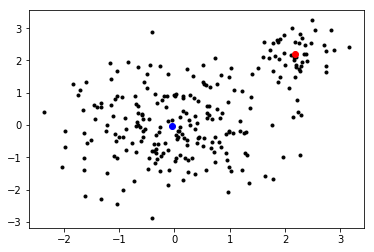

In [64]:
import scipy.io
import numpy as np
import copy
import matplotlib.pyplot as plt

mat = scipy.io.loadmat('hw5_p1a.mat')
X = mat['X']

################################################## a) #############################################
# Assume 2 clusters, K = 2
K = 2

# Define a run_again var to determine if we're done or not and init to True
z = {
    1: {},
    2: {}
}
# Run until the mu's are not changed anymore
while True:

    # Guess their centroids (qualified guess :)
    mu_1 = [3,3]
    mu_2 = [0,0]

    # Create a dictionary for z_nk, where k = {1,2} and n are the points
    z_n = copy.deepcopy(z)

    # Calculate the distance from every point to mu_1 and mu_2
    for i in range(0, len(X)):
        p = X[i]
        mu_1_dist = np.linalg.norm(p-mu_1)
        mu_2_dist = np.linalg.norm(p-mu_2)

        # Assign the closest distance to its corresponding mu
        if mu_1_dist < mu_2_dist:
            z[1][i] = 1
            z[2][i] = 0
        else:
            z[1][i] = 0
            z[2][i] = 1
            
    def new_mu(z,k,x):
        numerator = np.zeros(2)
        for i in range(0,len(x)):
            numerator += x[i] * z[k][i]
        
        d = 0
        for j in range(0,len(z[k])):
            d += z[k][j]
            
        print(d)

        return numerator / d
    print("d")
    # Calculate new mu
    mu_1 = new_mu(z,1,X)
    mu_2 = new_mu(z,2,X)

    # Check if mu is different
    if np.array_equal(z, z_n):
        break

# At this point, the mu's are optimal
print(mu_1)
print(mu_2)

#colors = []
#for i in range(0, len(x_co)):
#    if i == 2:
#        colors.append("r")
#    else:
#       colors.append("b")
        
plt.plot(X[:,0],X[:,1],'k.')
plt.plot(mu_1[0],mu_1[1],'ro')
plt.plot(mu_2[0],mu_2[1],'bo')
plt.show()